In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Question 1

Shape:  (540, 960, 3)


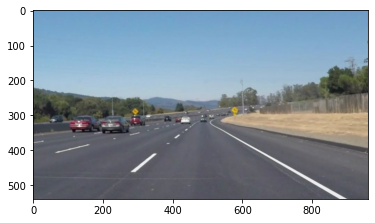

In [2]:
img = cv2.imread('solidWhiteCurve.jpg')
print('Shape: ', img.shape)
plt.imshow(img[:,:,::-1]);

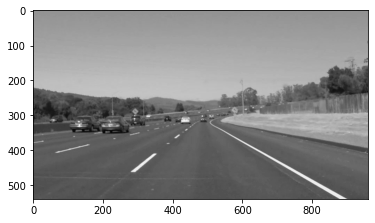

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

**First Image**

In [4]:
def nothing(x):
#     print(x)
    pass
# RGB tracker
cv2.namedWindow("my_image") # name of window put inside it tracker and image
cv2.createTrackbar('f', 'my_image', 1, 9, nothing)
cv2.createTrackbar('low_th', 'my_image', 0, 255, nothing)
cv2.createTrackbar('high_th', 'my_image', 0, 255, nothing)

while True:
    img = cv2.imread('solidWhiteCurve.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    f = cv2.getTrackbarPos('f', 'my_image') #get value which is put on trackbar
    low_th = cv2.getTrackbarPos('low_th', 'my_image') #get value which is put on trackbar
    high_th = cv2.getTrackbarPos('high_th', 'my_image') #get value which is put on trackbar
    if f%2 == 0: #even
        f = f + 1
    blur = cv2.GaussianBlur(gray, (f,f), 0)
    edges = cv2.Canny(blur, low_th, high_th)

    cv2.imshow('my_image', edges) #print img in same window
    k = cv2.waitKey(1)
    if k == ord('q'):
        break
cv2.destroyAllWindows()

**Second Image**

In [5]:
def nothing(x):
#     print(x)
    pass
# RGB tracker
cv2.namedWindow("my_image") # name of window put inside it tracker and image
cv2.createTrackbar('f', 'my_image', 1, 9, nothing)
cv2.createTrackbar('low_th', 'my_image', 0, 255, nothing)
cv2.createTrackbar('high_th', 'my_image', 0, 255, nothing)

while True:
    img = cv2.imread('solidYellowCurve2.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    f = cv2.getTrackbarPos('f', 'my_image') #get value which is put on trackbar
    low_th = cv2.getTrackbarPos('low_th', 'my_image') #get value which is put on trackbar
    high_th = cv2.getTrackbarPos('high_th', 'my_image') #get value which is put on trackbar
    if f%2 == 0: #even
        f = f + 1
    blur = cv2.GaussianBlur(gray, (f,f), 0)
    edges = cv2.Canny(blur, low_th, high_th)

    cv2.imshow('my_image', edges) #print img in same window
    k = cv2.waitKey(1)
    if k == ord('q'):
        break
cv2.destroyAllWindows()

#### Question 2

In [6]:
def maskROI(img):
    mask = np.zeros_like(img)
    if len(img.shape) > 2:
        channel_count = img.shape[2]
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
    imshape = img.shape        
    vertices = np.array([
    [
      ((1/6*imshape[1]), imshape[0]),
      ((5/12*imshape[1]), (3/5*imshape[0])),
      ((7/12*imshape[1]), (3/5*imshape[0])),
      ((9/10*imshape[1]), imshape[0])
    ]], dtype=np.int32)
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_edges = cv2.bitwise_and(img, mask)
    return(masked_edges)

def draw_lines(lines, masked_edges):
    color = [243, 105, 14]
    thickness = 12
    lines_image = np.zeros((masked_edges.shape[0], masked_edges.shape[1], 3), dtype=np.uint8)
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(lines_image, (x1, y1), (x2, y2), color, thickness)
    return(lines_image)

**First Image**

In [7]:
from helpers import helpers_formulate_lanes as formulate_lanes
f = 7
low_th = 140
high_th = 215
RHO = 1                 # try: 1 - 4 (0.5 increments)  
THETA = np.pi/180       # Usually this is Ok


def nothing(x):
#     print(x)
    pass
# RGB tracker
cv2.namedWindow("my_image") # name of window put inside it tracker and image
cv2.createTrackbar('MIN_VOTES', 'my_image', 1, 10, nothing)
cv2.createTrackbar('MIN_LINE_LEN', 'my_image', 2, 10, nothing)
cv2.createTrackbar('MAX_LINE_GAP', 'my_image', 2, 25, nothing)

while True:
    img = cv2.imread('solidWhiteCurve.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (f,f), 0)
    edges = cv2.Canny(blur, low_th, high_th)
    masked = maskROI(edges)
    
    MIN_VOTES = cv2.getTrackbarPos('MIN_VOTES', 'my_image') #get value which is put on trackbar
    MIN_LINE_LEN = cv2.getTrackbarPos('MIN_LINE_LEN', 'my_image') #get value which is put on trackbar
    MAX_LINE_GAP = cv2.getTrackbarPos('MAX_LINE_GAP', 'my_image') #get value which is put on trackbar
    
    lines = cv2.HoughLinesP(masked, RHO, THETA, MIN_VOTES, np.array([]), minLineLength=MIN_LINE_LEN, maxLineGap=MAX_LINE_GAP)
    lanes = formulate_lanes(lines, masked)
    lanes_img = draw_lines(lanes, img)
    cv2.imshow('my_image', lanes_img) #print img in same window
    k = cv2.waitKey(1)
    if k == ord('q'):
        break
cv2.destroyAllWindows()

C:\Users\ahmed\Desktop\summer courses\Machine Learning Specialization\venv\Computer Vision\day 9\LaneLines\helpers.py:68: RuntimeWarning: divide by zero encountered in int_scalars
  slope = (y2-y1)/(x2-x1)


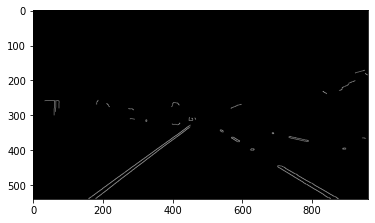

In [8]:
img = cv2.imread('solidYellowCurve2.jpg') # 7 140 215
f = 7
low_th = 140
high_th = 215
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (f,f), 0)
edges = cv2.Canny(blur, low_th, high_th)
plt.imshow(edges, cmap='gray')

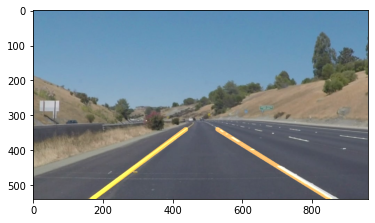

In [9]:
from helpers import helpers_formulate_lanes as formulate_lanes
RHO = 1                 # try: 1 - 4 (0.5 increments)  
THETA = np.pi/180       # Usually this is Ok
MIN_VOTES = 10          # try: 10 - 50                  # Typical: 30
MIN_LINE_LEN = 5 
MAX_LINE_GAP = 50 

masked = maskROI(edges)
lines = cv2.HoughLinesP(masked, RHO, THETA, MIN_VOTES, np.array([]), minLineLength=MIN_LINE_LEN, maxLineGap=MAX_LINE_GAP)
lanes = formulate_lanes(lines, masked)
lanes_img = draw_lines(lanes, img)
final_image = cv2.addWeighted(img[:,:,::-1], 0.9, lanes_img, 1, 0)
plt.imshow(final_image)

**Second Image**

In [10]:
from helpers import helpers_formulate_lanes as formulate_lanes
f = 7
low_th = 140
high_th = 215
RHO = 1                 # try: 1 - 4 (0.5 increments)  
THETA = np.pi/180       # Usually this is Ok


def nothing(x):
#     print(x)
    pass
# RGB tracker
cv2.namedWindow("my_image") # name of window put inside it tracker and image
cv2.createTrackbar('MIN_VOTES', 'my_image', 1, 10, nothing)
cv2.createTrackbar('MIN_LINE_LEN', 'my_image', 2, 10, nothing)
cv2.createTrackbar('MAX_LINE_GAP', 'my_image', 2, 25, nothing)

while True:
    img = cv2.imread('solidYellowCurve2.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (f,f), 0)
    edges = cv2.Canny(blur, low_th, high_th)
    masked = maskROI(edges)
    
    MIN_VOTES = cv2.getTrackbarPos('MIN_VOTES', 'my_image') #get value which is put on trackbar
    MIN_LINE_LEN = cv2.getTrackbarPos('MIN_LINE_LEN', 'my_image') #get value which is put on trackbar
    MAX_LINE_GAP = cv2.getTrackbarPos('MAX_LINE_GAP', 'my_image') #get value which is put on trackbar
    
    lines = cv2.HoughLinesP(masked, RHO, THETA, MIN_VOTES, np.array([]), minLineLength=MIN_LINE_LEN, maxLineGap=MAX_LINE_GAP)
    lanes = formulate_lanes(lines, masked)
    lanes_img = draw_lines(lanes, img)
    cv2.imshow('my_image', lanes_img) #print img in same window
    k = cv2.waitKey(1)
    if k == ord('q'):
        break
cv2.destroyAllWindows()

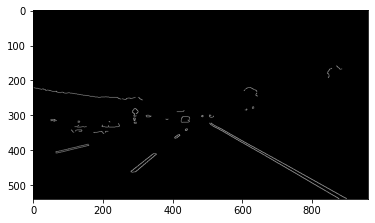

In [11]:
img = cv2.imread('solidWhiteCurve.jpg') # 7 140 215
f = 7
low_th = 140
high_th = 215
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (f,f), 0)
edges = cv2.Canny(blur, low_th, high_th)
plt.imshow(edges, cmap='gray')

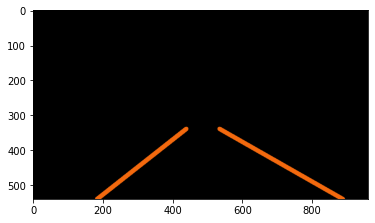

In [12]:
from helpers import helpers_formulate_lanes as formulate_lanes
RHO = 1                 # try: 1 - 4 (0.5 increments)  
THETA = np.pi/180       # Usually this is Ok
MIN_VOTES = 10          # try: 10 - 50                  # Typical: 30
MIN_LINE_LEN = 5 
MAX_LINE_GAP = 50 

masked = maskROI(edges)
lines = cv2.HoughLinesP(masked, RHO, THETA, MIN_VOTES, np.array([]), minLineLength=MIN_LINE_LEN, maxLineGap=MAX_LINE_GAP)
lanes = formulate_lanes(lines, masked)
# print(lanes)
lanes_img = draw_lines(lanes, img)
plt.imshow(lanes_img);

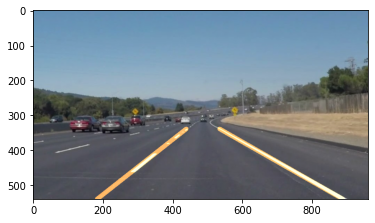

In [13]:
final_image = cv2.addWeighted(img[:,:,::-1], 0.9, lanes_img, 1, 0)
plt.imshow(final_image)

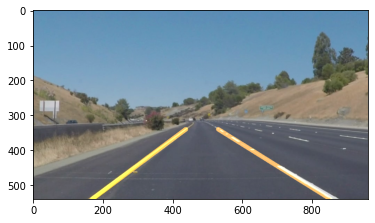

In [14]:
img = cv2.imread('solidYellowCurve2.jpg') # 7 140 215
f = 7
low_th = 140
high_th = 215
RHO = 1                 # try: 1 - 4 (0.5 increments)  
THETA = np.pi/180       # Usually this is Ok
MIN_VOTES = 10          # try: 10 - 50                  # Typical: 30
MIN_LINE_LEN = 10 
MAX_LINE_GAP = 50 

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (f,f), 0)
edges = cv2.Canny(blur, low_th, high_th)
# plt.imshow(edges, cmap='gray')
masked = maskROI(edges)
lines = cv2.HoughLinesP(masked, RHO, THETA, MIN_VOTES, np.array([]), minLineLength=MIN_LINE_LEN, maxLineGap=MAX_LINE_GAP)
lanes = formulate_lanes(lines, masked)
# print(lanes)
lanes_img = draw_lines(lanes, img)
# plt.imshow(lanes_img);
final_image = cv2.addWeighted(img[:,:,::-1], 0.9, lanes_img, 1, 0)
plt.imshow(final_image)

In [15]:
cap = cv2.VideoCapture('solidWhiteRight.mp4')
f = 7
low_th = 140
high_th = 215
RHO = 1                 # try: 1 - 4 (0.5 increments)  
THETA = np.pi/180       # Usually this is Ok
MIN_VOTES = 10          # try: 10 - 50                  # Typical: 30
MIN_LINE_LEN = 10 
MAX_LINE_GAP = 50 

while cap.isOpened():
    stat, img = cap.read()
    if stat == True: 
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gray, (f,f), 0)
        edges = cv2.Canny(blur, low_th, high_th)
        # plt.imshow(edges, cmap='gray')
        masked = maskROI(edges)
        lines = cv2.HoughLinesP(masked, RHO, THETA, MIN_VOTES, np.array([]), minLineLength=MIN_LINE_LEN, maxLineGap=MAX_LINE_GAP)
        lanes = formulate_lanes(lines, masked)
        # print(lanes)
        lanes_img = draw_lines(lanes, img)
        # plt.imshow(lanes_img);
        final_image = cv2.addWeighted(img[:,:,::-1], 0.9, lanes_img, 1, 0)        
        cv2.imshow('img_title', final_image[:, :, ::-1])
        k = cv2.waitKey(20) 
        if k == ord('q'):
            break
    else: #wrong frame or video finished
        k = cv2.waitKey(20) # read char every 20 milli sec
        if k == ord('q'):
            break
        print("wrong_frame")
cap.release()
cv2.destroyAllWindows()

wrong_frame
wrong_frame
wrong_frame
wrong_frame
wrong_frame
wrong_frame
wrong_frame
wrong_frame
wrong_frame
wrong_frame
wrong_frame
wrong_frame
wrong_frame
wrong_frame
wrong_frame
wrong_frame
wrong_frame
wrong_frame
wrong_frame
wrong_frame
wrong_frame
wrong_frame
wrong_frame
wrong_frame
wrong_frame
wrong_frame
wrong_frame
wrong_frame
wrong_frame
wrong_frame
wrong_frame
wrong_frame
wrong_frame
wrong_frame
wrong_frame
wrong_frame
wrong_frame
wrong_frame
wrong_frame
wrong_frame


# Re Session

In [16]:
def maskROI(img):
    mask = np.zeros_like(img) # same shape like image with zeros
    if len(img.shape) > 2:
        channel_count = img.shape[-1]
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    imshape = img.shape        
    vertices = np.array([
    [
      ((1/6*imshape[1]), imshape[0]),
      ((5/12*imshape[1]), (3/5*imshape[0])),
      ((7/12*imshape[1]), (3/5*imshape[0])),
      ((9/10*imshape[1]), imshape[0])
    ]], dtype=np.int32)
    
    cv2.fillPoly(mask, vertices, ignore_mask_color) # polylines vs fillPoly
    masked_edges = cv2.bitwise_and(img, mask) # bitwise and
    return(masked_edges) # return masked = edges and mask

def draw_lines(lines, masked_edges):
    colors = [243, 105, 14]
    thickness = 12
    lines_image = np.zeros((masked_edges.shape[0], masked_edges.shape[1], 3), dtype=np.uint8)
    for line in lines:
        for x1,y1,x2,y2 in line:
#             R = int(np.random.randint(0, 255, (1,)))
#             G = int(np.random.randint(0, 255, (1,)))
#             B = int(np.random.randint(0, 255, (1,)))
#             colors = (R, G ,B)
#             print(colors)
            cv2.line(lines_image, (x1, y1), (x2, y2), colors, thickness)
    return(lines_image) # return image have lines drawn


# Imports
from helpers import helpers_formulate_lanes as formulate_lanes
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Constants
f = 7
low_th = 140
high_th = 215
RHO = 1                 # try: 1 - 4 (0.5 increments)  
THETA = np.pi/180       # Usually this is Ok
MIN_VOTES = 10          # try: 10 - 50                  # Typical: 30
MIN_LINE_LEN = 10 
MAX_LINE_GAP = 50 

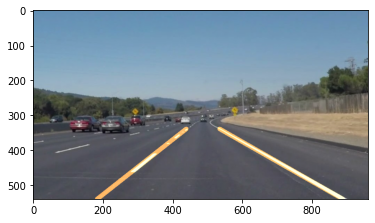

In [17]:
img = cv2.imread('solidWhiteCurve.jpg') # 7 140 215
# Resize + calibration
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # BGR -> Gray
blur = cv2.GaussianBlur(gray, (f,f), 0)
edges = cv2.Canny(blur, low_th, high_th)
# plt.imshow(edges, cmap='gray')
masked = maskROI(edges) 
lines = cv2.HoughLinesP(masked, RHO, THETA, MIN_VOTES, np.array([]), minLineLength=MIN_LINE_LEN, maxLineGap=MAX_LINE_GAP)
lanes = formulate_lanes(lines, masked) 
# print(lanes)
lanes_img = draw_lines(lanes, img)
# plt.imshow(lanes_img);
final_image = cv2.addWeighted(img[:,:,::-1], 0.9, lanes_img, 1, 0) # img, wieght_1, mask_img, weight_2, multicolorChannel=0
plt.imshow(final_image)

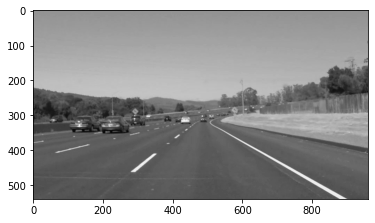

In [18]:
img = cv2.imread('solidWhiteCurve.jpg') # 7 140 215
# Resize + calibration
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # BGR -> Gray
plt.imshow(gray, cmap='gray')

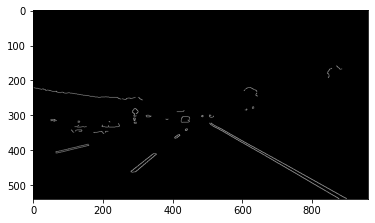

In [19]:
blur = cv2.GaussianBlur(gray, (f,f), 0) # Noisy edges -> smoth
edges = cv2.Canny(blur, low_th, high_th) # Gx, Gy
plt.imshow(edges, cmap='gray')

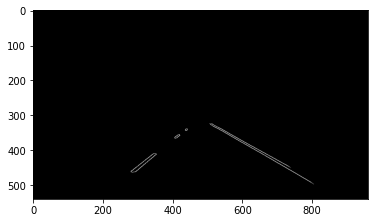

In [20]:
masked = maskROI(edges)
plt.imshow(masked, cmap='gray')

In [21]:
lines = cv2.HoughLinesP(masked, RHO, THETA, MIN_VOTES, np.array([]), minLineLength=MIN_LINE_LEN, maxLineGap=MAX_LINE_GAP) # 
print(lines)

[[[507 324 796 491]]

 [[511 324 738 450]]

 [[506 324 800 494]]

 [[409 366 442 340]]

 [[406 364 439 339]]

 [[293 462 353 412]]

 [[281 460 341 412]]

 [[512 324 734 447]]

 [[508 326 626 394]]

 [[405 363 415 356]]

 [[280 462 345 410]]

 [[336 425 352 412]]

 [[414 363 442 341]]]


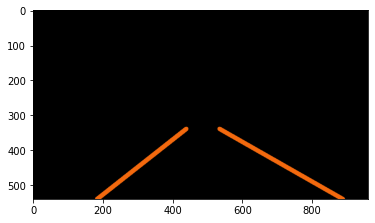

In [22]:
lanes = formulate_lanes(lines, masked) 
# print(lanes)
lanes_img = draw_lines(lanes, img)
plt.imshow(lanes_img, cmap='gray')

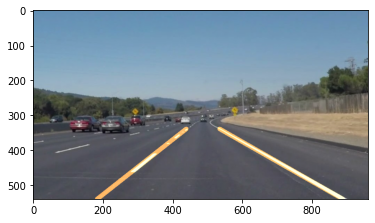

In [23]:
final_image = cv2.addWeighted(img[:,:,::-1], 0.9, lanes_img, 1, 0) # img, wieght_1, mask_img, weight_2, multicolorChannel=0
plt.imshow(final_image)